In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import missingno as msno

In [2]:
dataset = pd.read_csv('Breast_cancer.csv')

In [3]:
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
#input_output separation
y = dataset.diagnosis
lst = ['id','diagnosis','Unnamed: 32']
X = dataset.drop(lst,axis=1)
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


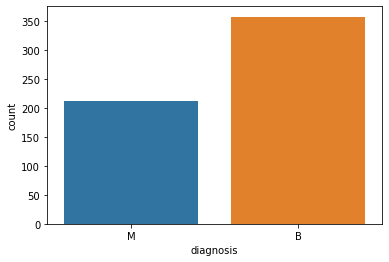

In [5]:
#diagnosis data visualize
ax = sns.countplot(y,label="Count")

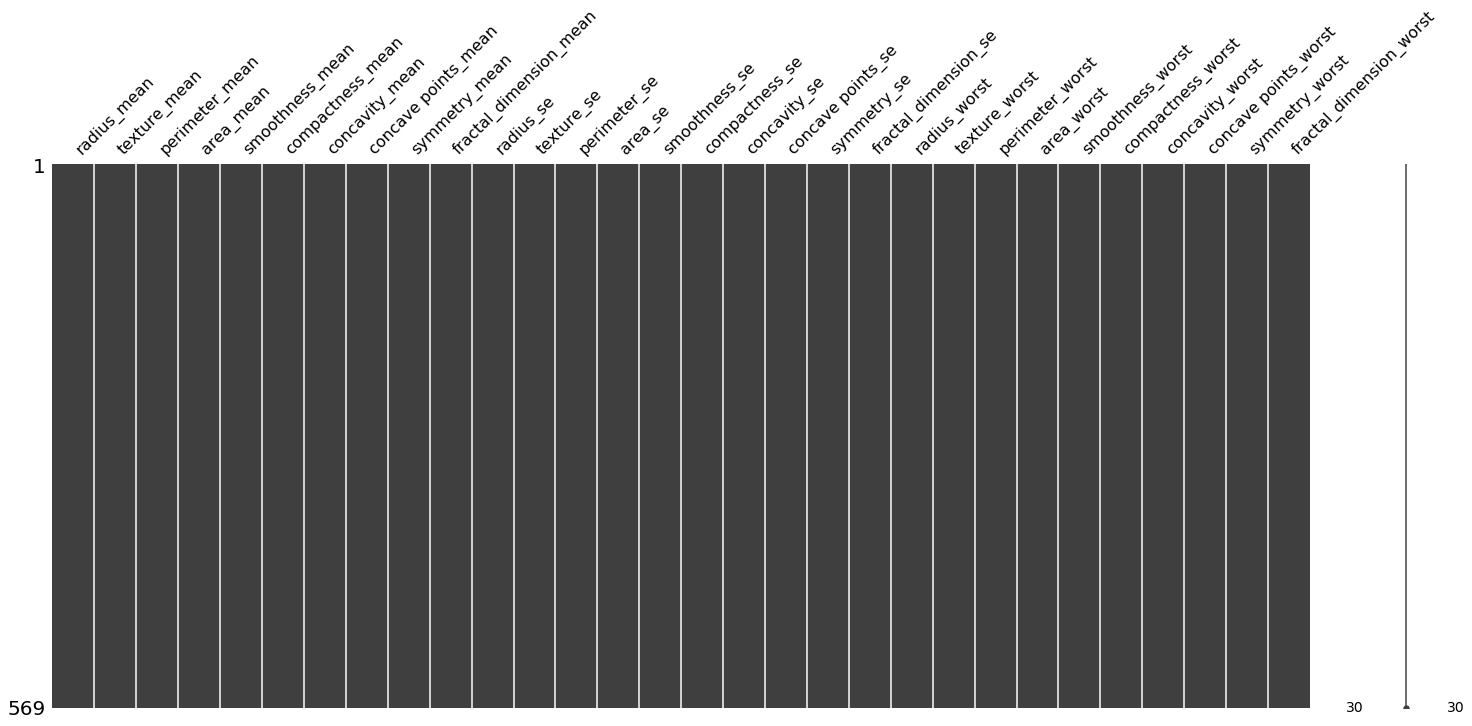

In [6]:
#for missing no in dataset
msno.matrix(X)#absolutely no missing data

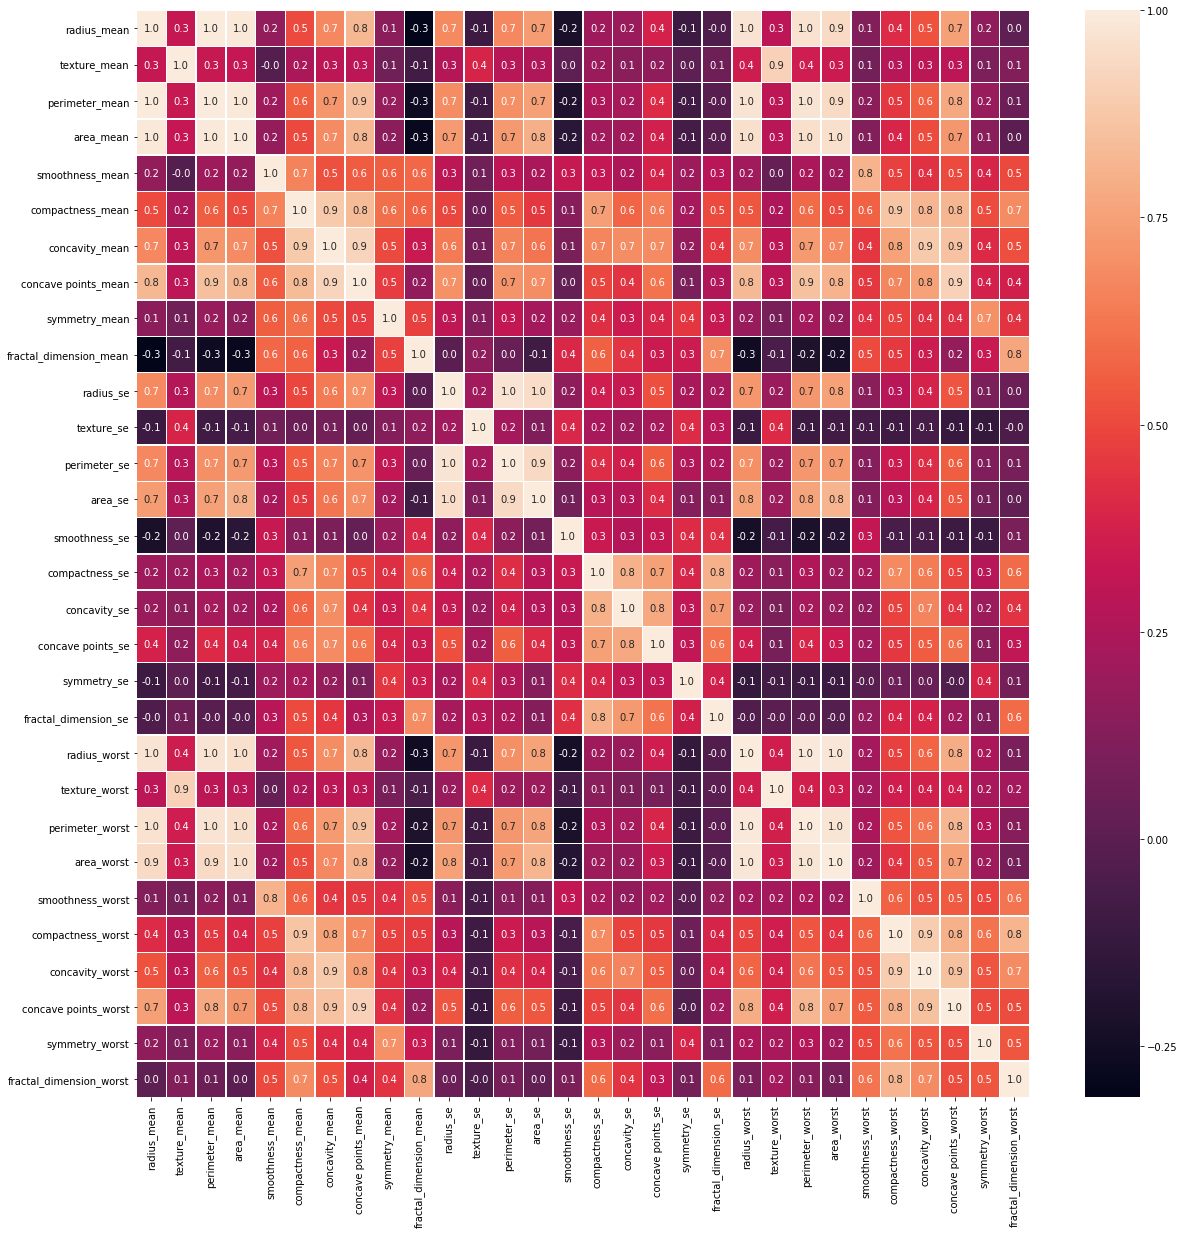

In [7]:
#corelation map
f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)


# Using chi2 feature selection

In [8]:
#feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# find best scored 5 features
select_feature = SelectKBest(chi2, k=5).fit(X, y)

In [9]:
print('Score list:', select_feature.scores_)
print('Feature list:', X.columns)

Score list: [2.66104917e+02 9.38975081e+01 2.01110286e+03 5.39916559e+04
 1.49899264e-01 5.40307549e+00 1.97123536e+01 1.05440354e+01
 2.57379775e-01 7.43065536e-05 3.46752472e+01 9.79353970e-03
 2.50571896e+02 8.75850471e+03 3.26620664e-03 6.13785332e-01
 1.04471761e+00 3.05231563e-01 8.03633831e-05 6.37136566e-03
 4.91689157e+02 1.74449400e+02 3.66503542e+03 1.12598432e+05
 3.97365694e-01 1.93149220e+01 3.95169151e+01 1.34854195e+01
 1.29886140e+00 2.31522407e-01]
Feature list: Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'c

In [10]:
X_sorted = select_feature.transform(X)

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_sorted = sc.fit_transform(X_sorted)

In [12]:
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sorted, y, test_size = 0.25, random_state = 0)

In [14]:
# Fitting classifier to the Training set
# Create your classifier here
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100,criterion = 'entropy',random_state = 0)
classifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [15]:
y_pred = classifier.predict(X_test)

Accuracy is %: 95.1048951048951


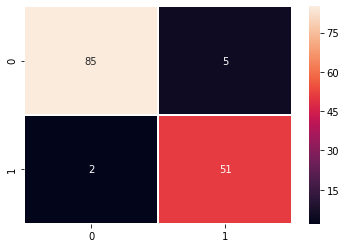

In [16]:
#evaluation
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

ac = accuracy_score(y_test,y_pred)
print("Accuracy is %:" ,ac*100)

cm = confusion_matrix(y_test,y_pred)
ax = sns.heatmap(cm,annot=True,linewidth=.5,fmt="d")


In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_sv = sc.fit_transform(X_sorted)

In [18]:
from sklearn.model_selection import train_test_split
X_trains, X_tests, y_trains, y_tests = train_test_split(X_sv, y, test_size = 0.25, random_state = 0)

In [41]:
# Fitting classifier to the Training set
# Create your classifier here
from sklearn.svm import SVC
classifier_k = SVC(kernel = 'rbf',random_state = 2)
classifier_k.fit(X_trains,y_trains)

C:\Users\Indranil\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=2,
    shrinking=True, tol=0.001, verbose=False)

In [42]:
# Predicting the Test set results
y_preds = classifier_k.predict(X_tests)

Accuracy is %: 94.4055944055944


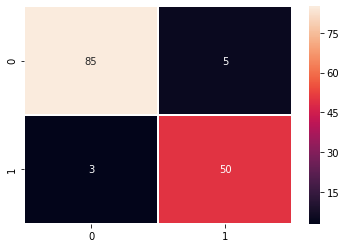

In [43]:
#evaluation
ac_2 = accuracy_score(y_tests,y_preds)
print("Accuracy is %:" ,ac_2*100)

cm_2 = confusion_matrix(y_tests,y_preds)
ax = sns.heatmap(cm_2,annot=True,linewidth=.5,fmt="d")


# With PCA feature Selection

In [88]:
#input_output separation
y2 = dataset.diagnosis
lst = ['id','diagnosis','Unnamed: 32']
X2 = dataset.drop(lst,axis=1)
X2.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [89]:
#Applying PCA with 10 features
from sklearn.decomposition import PCA
pca = PCA(n_components = 10)
X2 = pca.fit_transform(X2)
explained_variance = pca.explained_variance_ratio_

In [90]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_2sorted = sc.fit_transform(X2)

In [91]:
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
y2 = labelencoder_y.fit_transform(y2)

In [92]:
from sklearn.model_selection import train_test_split
X_trainP, X_testP, y_trainP, y_testP = train_test_split(X_2sorted, y2, test_size = 0.25, random_state = 0)

In [93]:
# Fitting classifier to the Training set
# Create your classifier here
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100,criterion = 'entropy',random_state = 0)
classifier.fit(X_trainP,y_trainP)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [94]:
y_predP = classifier.predict(X_testP)

Accuracy is %: 96.5034965034965


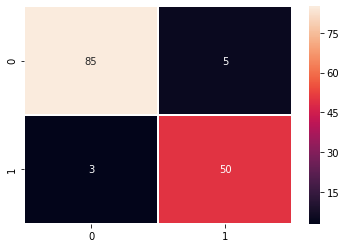

In [96]:
ac_P = accuracy_score(y_testP,y_predP)
print("Accuracy is %:" ,ac_P*100)

cm_P = confusion_matrix(y_testP,y_predP)
ax = sns.heatmap(cm_2,annot=True,linewidth=.5,fmt="d")

In [97]:
# Fitting classifier to the Training set
# Create your classifier here
from sklearn.svm import SVC
classifier_k_P = SVC(kernel = 'rbf',random_state = 2)
classifier_k_P.fit(X_trainP,y_trainP)

C:\Users\Indranil\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=2,
    shrinking=True, tol=0.001, verbose=False)

In [98]:
# Predicting the Test set results
y_predP2 = classifier_k_P.predict(X_testP)

Accuracy is %: 95.1048951048951


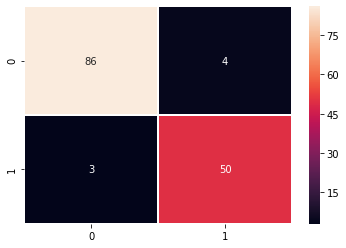

In [99]:
ac_P2 = accuracy_score(y_testP,y_predP2)
print("Accuracy is %:" ,ac_P2*100)

cm_P2 = confusion_matrix(y_testP,y_predP2)
ax = sns.heatmap(cm_P2,annot=True,linewidth=.5,fmt="d")